<a href="https://colab.research.google.com/github/pr-maryanarty/data_analyst_portfolio/blob/main/palm_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import data from csv

In [5]:
mill_df = pd.read_csv('/content/mill_data.csv', sep = ';', encoding='latin-1')
volume_df = pd.read_csv('/content/proforet_palm_oil.csv', sep = ';', encoding='latin-1')

In [6]:

mill_df['LATITUDE'] = mill_df['LATITUDE'].str.replace(',', '.').astype(float)
mill_df['LONGITUDE'] = mill_df['LONGITUDE'].str.replace(',', '.').astype(float)
mill_df_clean = mill_df.dropna(subset=['LATITUDE', 'LONGITUDE'])
import folium

mymap = folium.Map()

# Add markers for each location
for index, row in mill_df_clean.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['MILL NAME']).add_to(mymap)


from IPython.display import display

# Display the map
display(mymap)




In [46]:


# Create a map
mymap = folium.Map()

# Define colors for the legend
certification_colors = {
    'ip': 'green',
    'mb': 'red',
    'no': 'yellow'
}

# environmental risks
risk_icons = {
    'low': 'green',
    'medium': 'blue',
    'high': 'red'
}


    # Add markers for each location with popups, colors based on certifications, icons based on environmental risks, and size based on 'social risk'
for index, row in mill_df_clean.iterrows():
        environmental_risk = row['ENVIRONMENTAL RISK'].lower()
        risk_icon = risk_icons.get(environmental_risk, 'circle')
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            icon=folium.Icon(color=risk_icon),
            popup=row['MILL NAME']
        ).add_to(mymap)


        certification = row['RSPO'].lower()
        certification_color = certification_colors.get(certification, 'gray')
        social_risk = row['SOCIAL RISK']
        marker_size = social_risk * 5  # Scale the marker size based on the value of 'social risk'
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=marker_size,
            color=certification_color,
            fill=True,
            fill_color=certification_color,
            fill_opacity=0.4,
            popup=row['MILL NAME']
        ).add_to(mymap)





mymap


In [57]:
import folium


second_map = folium.Map()


certification_colors = {
    'ip': 'green',
    'mb': 'red',
    'no': 'yellow'
}


for index, row in mill_df_clean.iterrows():

    if row['ENGAGED'].lower() == 'yes':

        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            icon=folium.Icon(color='green'),
            popup=row['MILL NAME']
        ).add_to(second_map)
    else:

        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            icon=folium.Icon(color='red'),
            popup=row['MILL NAME']
        ).add_to(second_map)

    certification_color = certification_colors.get(row['RSPO'].lower(), 'gray')
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=10,
        color=certification_color,
        fill=True,
        fill_color=certification_color,
        fill_opacity=0.5
    ).add_to(second_map)


second_map


              DISTRICT  number_of_mills
0           Aceh Timur                2
1           Aceh Utara                2
2                 Agam                3
3        Fuente de Oro                1
4              GbÃ´kle                1
5              Golfito                1
6           Gua Musang                7
7           Gunung Mas                4
8          Hilir Perak               13
9        Hulu Selangor                4
10     Hulu Terengganu                2
11           Ijivitari                1
12     Indragiri Hilir                4
13        Kinabatangan               31
14               Kinta                1
15               Klang                2
16                Komo                1
17        Konawe Utara                1
18           Kota Baru               16
19         Kota Marudu                1
20         Kota Tinggi               19
21  Kotawaringin Barat                2
22             Manjung                4
23           Manokwari                1


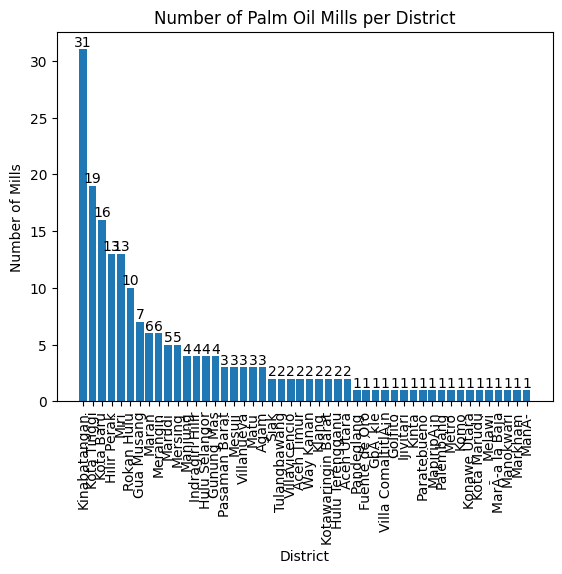

In [73]:
import matplotlib.pyplot as plt
# Grouping by district and counting mills in each district
mills_per_district = mill_df.groupby('DISTRICT').size().reset_index(name='number_of_mills')

print(mills_per_district)
mills_per_district_sorted = mills_per_district.sort_values(by='number_of_mills', ascending=False)

# Plotting as histogram
plt.bar_label(plt.bar(mills_per_district_sorted['DISTRICT'], mills_per_district_sorted['number_of_mills']), labels=mills_per_district_sorted['number_of_mills'])
plt.xlabel('District')
plt.ylabel('Number of Mills')
plt.title('Number of Palm Oil Mills per District')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')


plt.show()



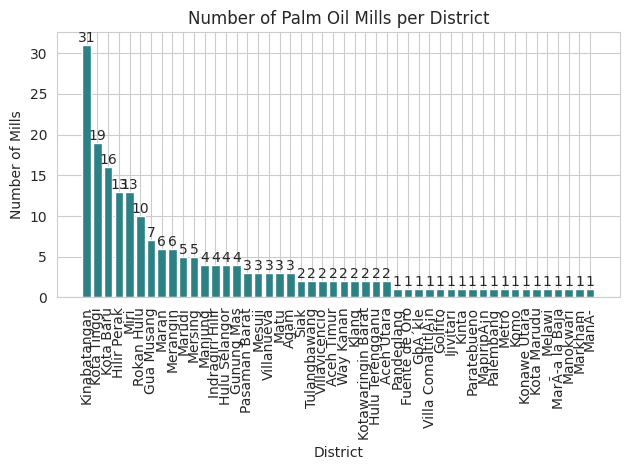

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

mills_per_district_sorted = mills_per_district.sort_values(by='number_of_mills', ascending=False)



bars = plt.bar(mills_per_district_sorted['DISTRICT'], mills_per_district_sorted['number_of_mills'], color='#2d8185')
plt.bar_label(bars, labels=mills_per_district_sorted['number_of_mills'])

plt.xlabel('District')
plt.ylabel('Number of Mills')
plt.title('Number of Palm Oil Mills per District')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
